# House Prices - Advanced Regression Techniques
Dataset from kaggle : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [96]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
train_data = pd.read_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/test.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [97]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Merge training data and testing data

In [99]:
ntrain = train_data.shape[0] #1460
ntest = test_data.shape[0] #1459
y_train = train_data['SalePrice'] #trainning data y
All_data = pd.concat((train_data, test_data)).reset_index(drop=True) #merge the trainning and testing data

All_data_feature = All_data.drop(['SalePrice'],axis=1)
print("all_data size is : {}".format(All_data.shape))

all_data size is : (2919, 81)


### Check the normality of sale price
From the probility plot,we can see the distribution of price is not normal 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


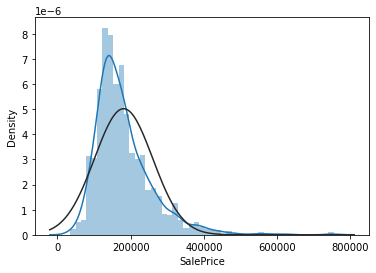

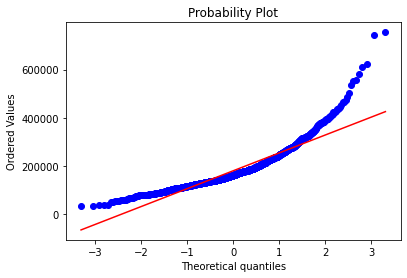

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
sns.distplot(train_data['SalePrice'],fit = norm)
# QQ plot
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'],plot=plt)

### transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


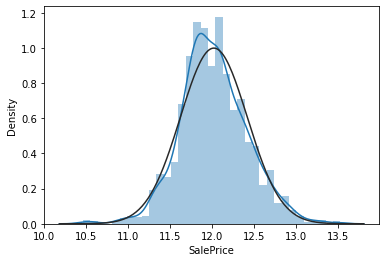

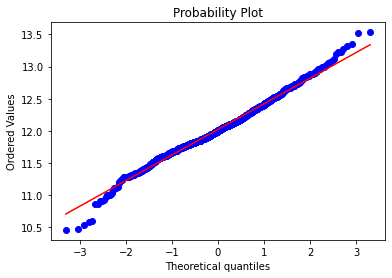

In [101]:
#applying log transformation
train_data['SalePrice'] = np.log(train_data['SalePrice'])
sns.distplot(train_data['SalePrice'],fit = norm)
# QQ plot
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'],plot=plt)

# Feature Engineering

### Convert the numeric varaible to into category varaible

In [102]:
All_data_feature['MSSubClass'] = All_data_feature['MSSubClass'].apply(str) # The building class
All_data_feature['MoSold'] = All_data_feature['MoSold'].apply(str) # Month Sold
All_data_feature['YrSold'] = All_data_feature['YrSold'].apply(str) # Year Sold
All_data_feature['OverallCond'] = All_data_feature['OverallCond'].apply(str) #Overall condition rating

### Separate numeric data and category data from all data

In [103]:
numeric_col = All_data_feature.columns[ All_data_feature.dtypes != 'object' ]
category_col = All_data_feature.columns[ All_data_feature.dtypes == 'object' ]
All_data_category = All_data_feature[category_col]
All_data_numeric = All_data_feature[numeric_col]

### Check for outliers for numeric features

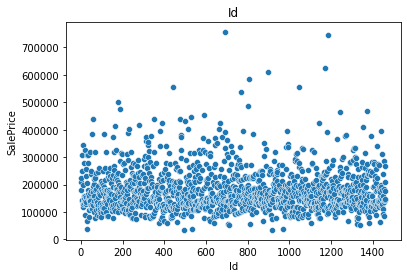

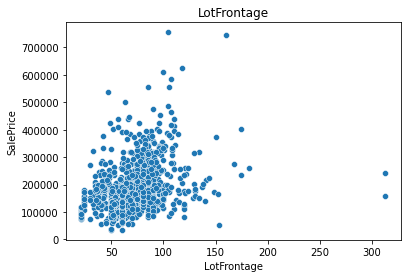

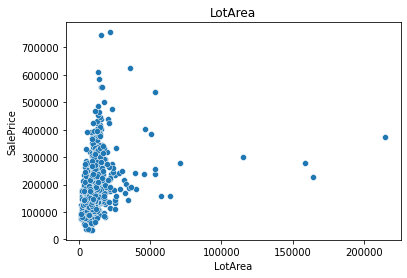

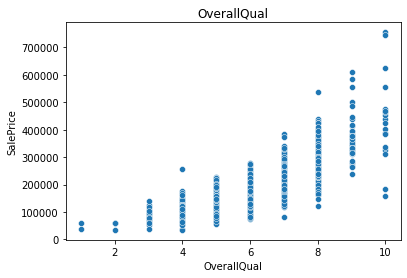

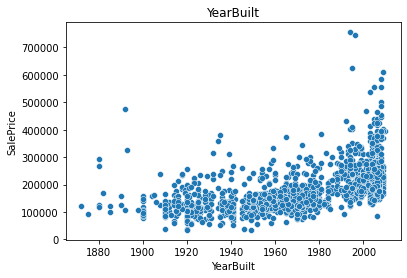

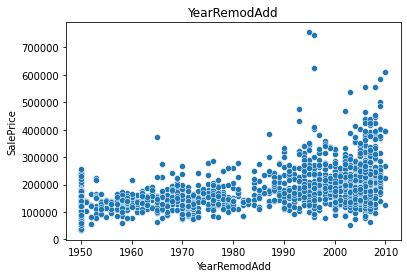

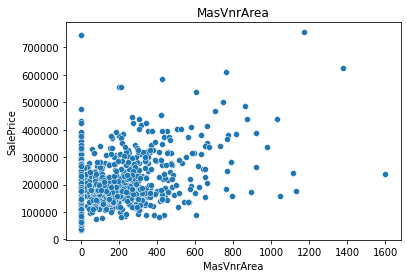

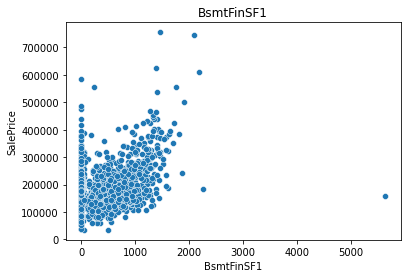

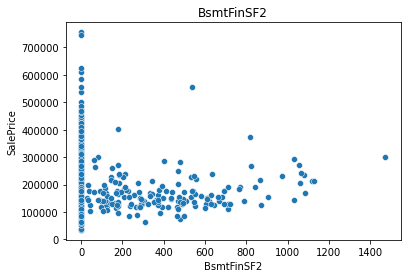

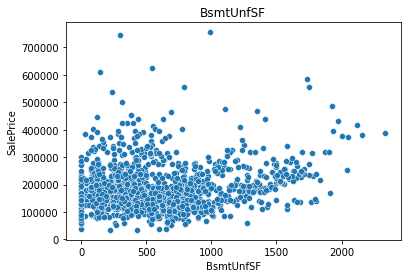

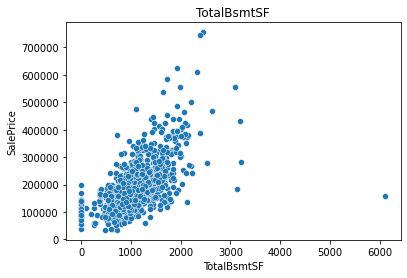

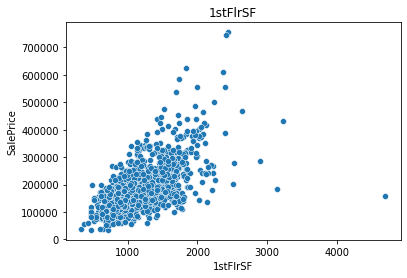

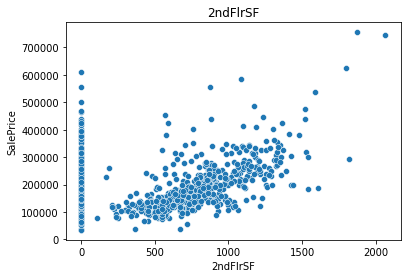

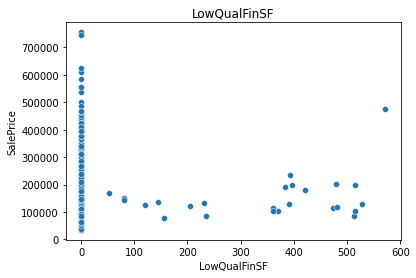

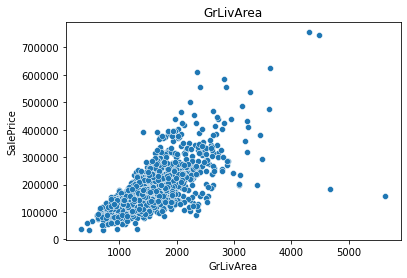

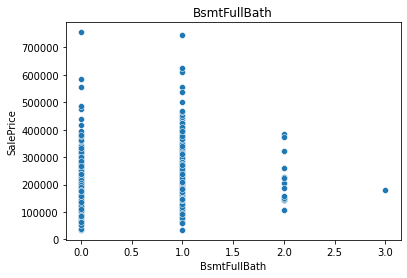

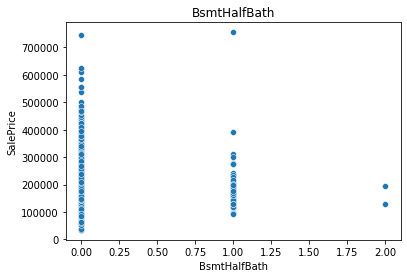

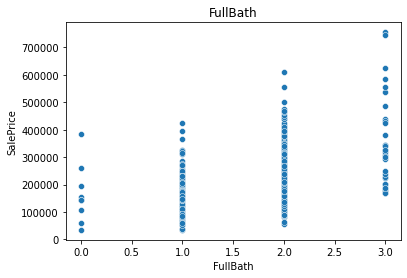

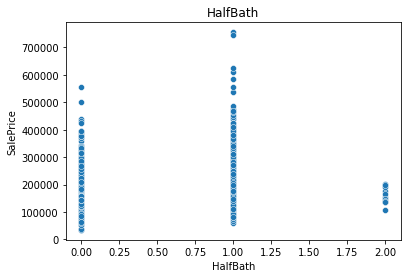

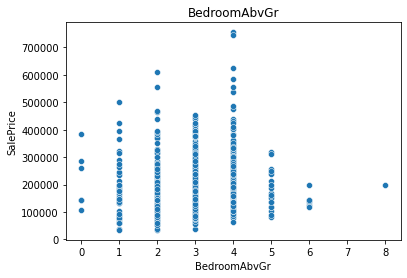

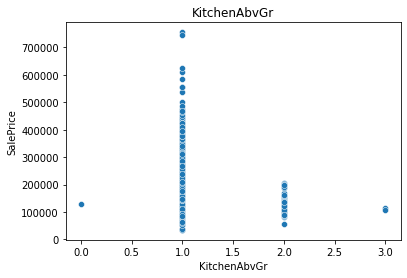

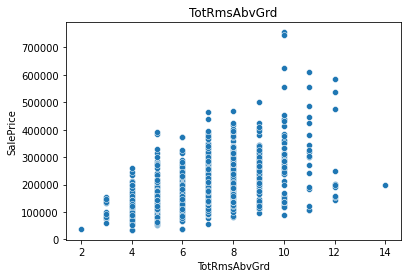

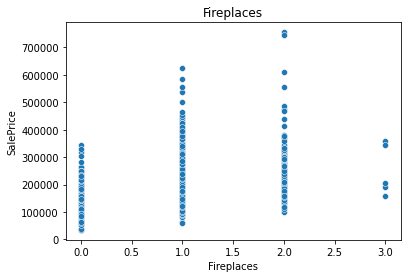

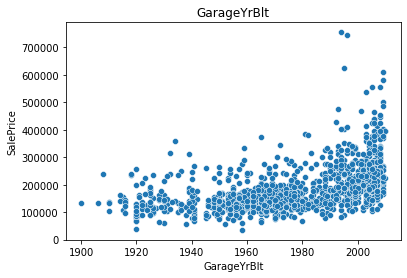

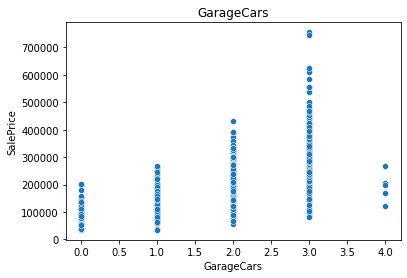

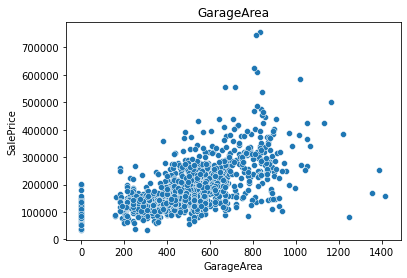

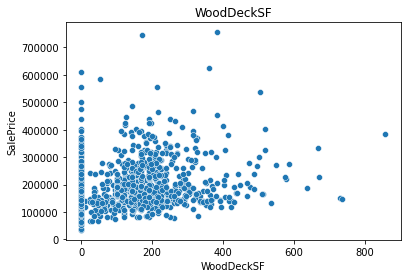

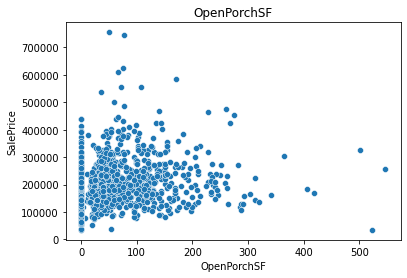

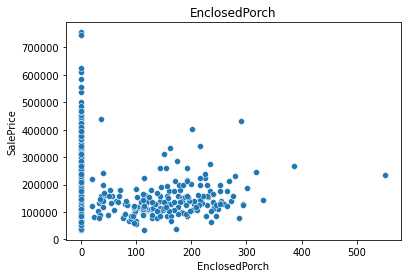

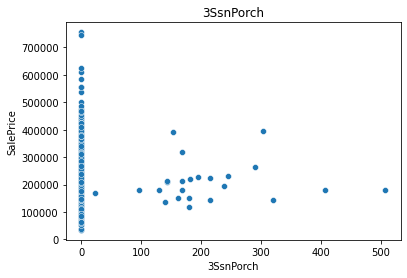

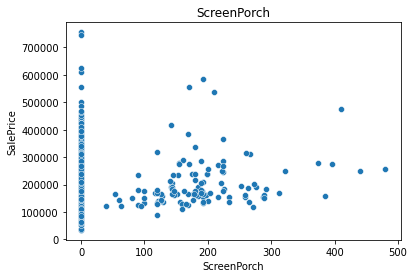

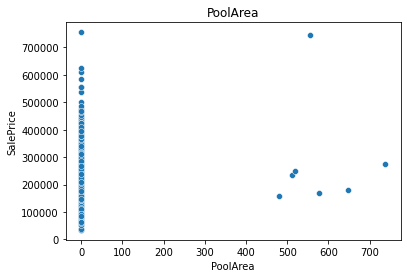

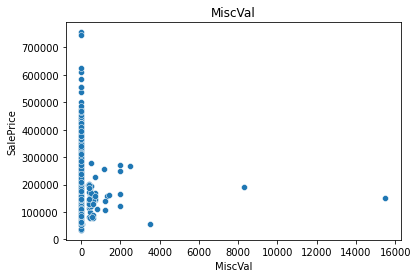

In [104]:
# Check the distribution of continuous variables and dependent variables
data_remove_outlier = All_data[:1460]

for col in numeric_col:
  sns.scatterplot( x = col, y="SalePrice", data = data_remove_outlier).set_title(col,fontsize=12,color='Black')
  plt.show()

### Remove the outlier

In [105]:
outlier_columns=['LotArea','LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF', 'GrLivArea','BedroomAbvGr','TotRmsAbvGrd', 'MiscVal']
outlier_threshold=[200000, 300, 1400, 5000, 6000, 4000, 4500, 8, 14, 8000]

for col ,n in zip(outlier_columns,outlier_threshold):
  data_remove_outlier = data_remove_outlier[data_remove_outlier[col]<n]

All_data = pd.concat((data_remove_outlier, All_data[1460:]), sort=False).reset_index(drop=True)

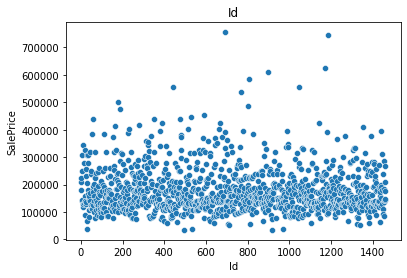

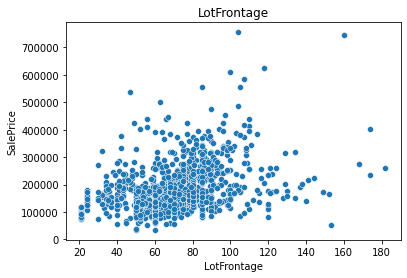

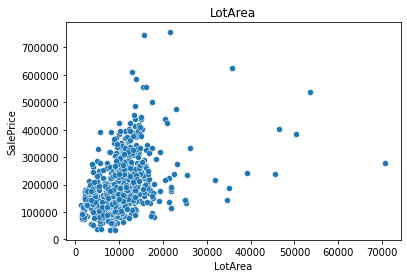

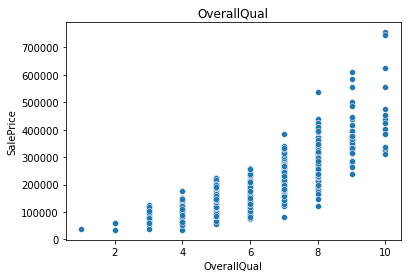

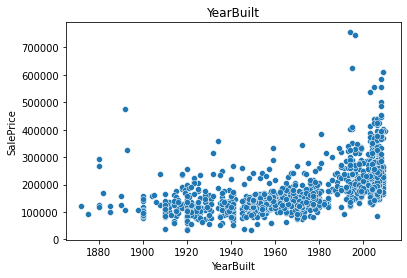

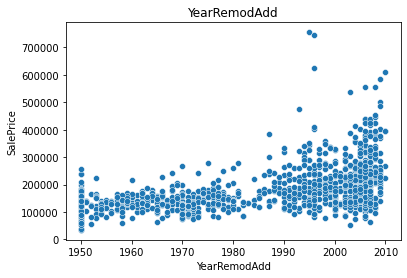

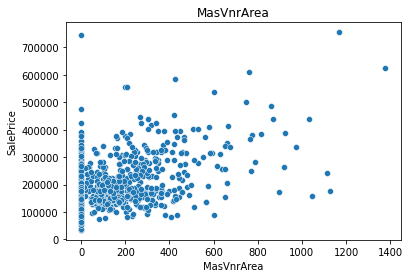

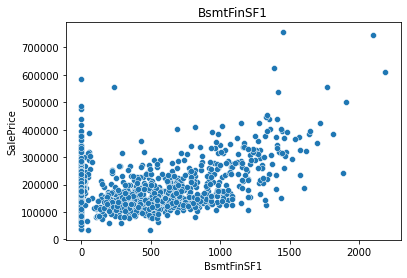

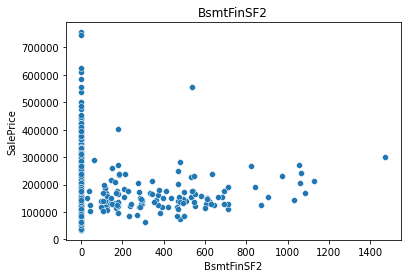

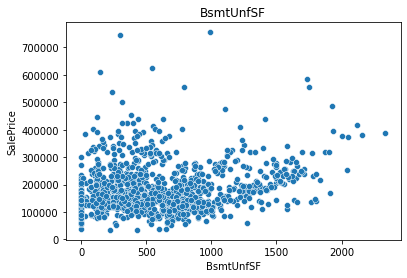

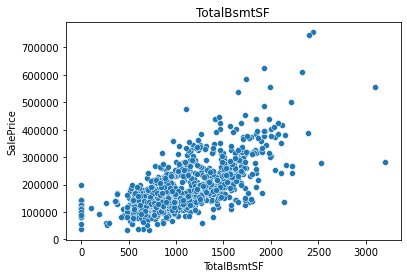

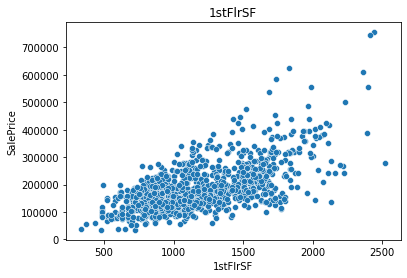

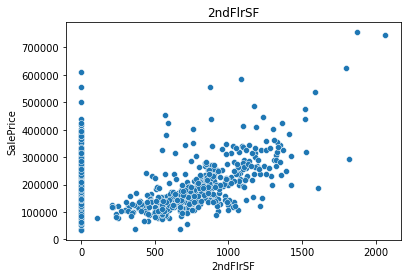

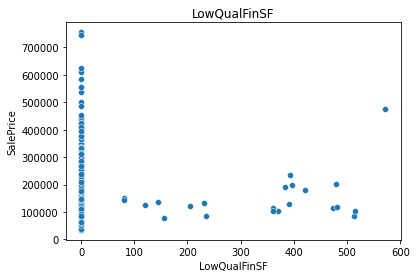

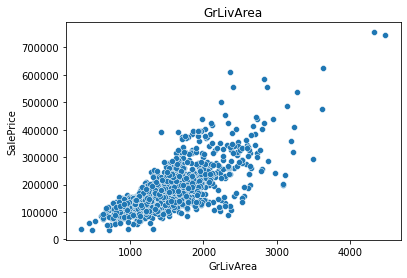

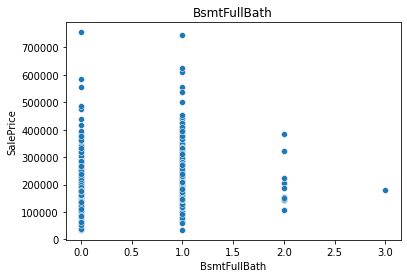

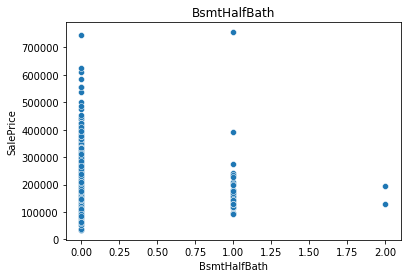

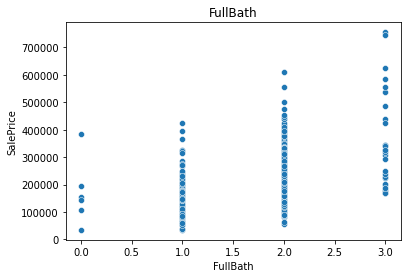

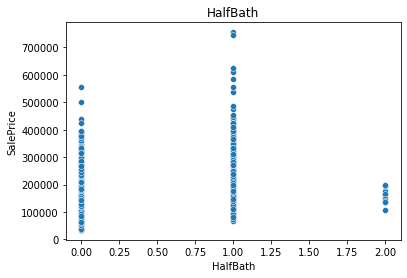

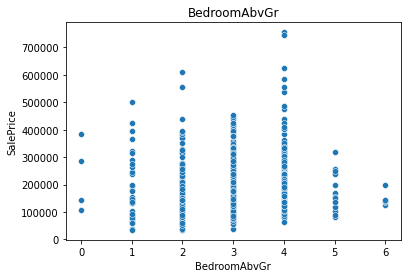

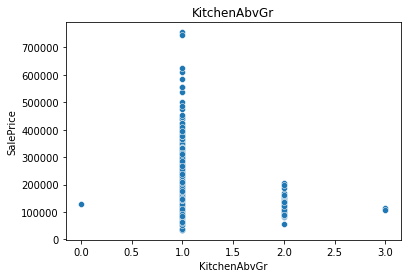

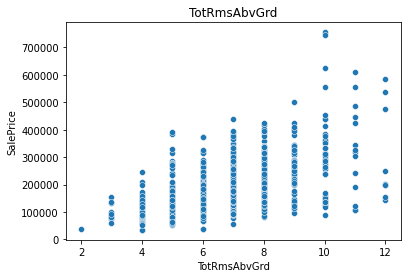

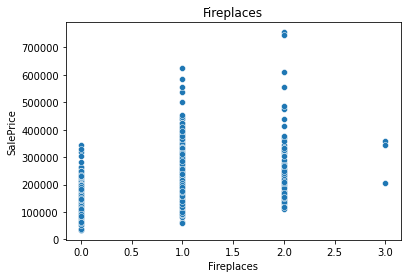

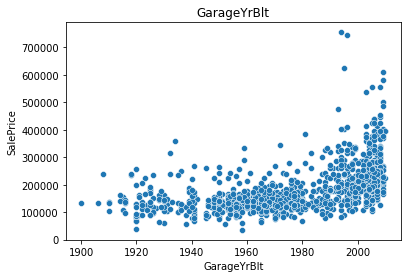

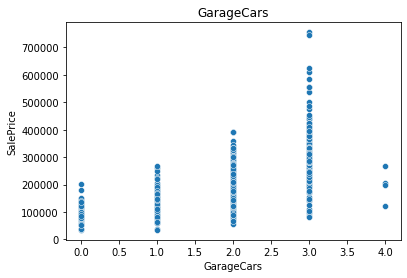

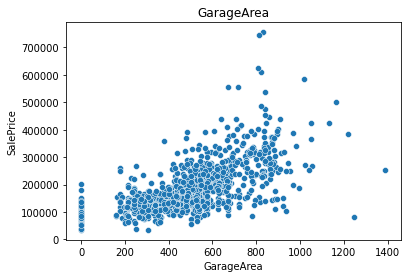

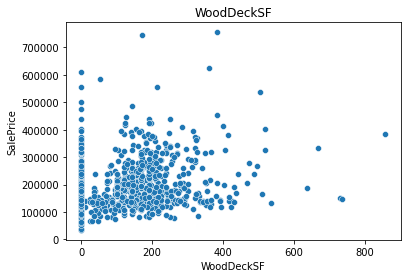

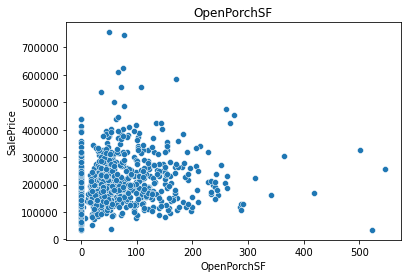

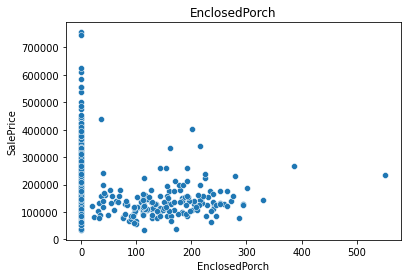

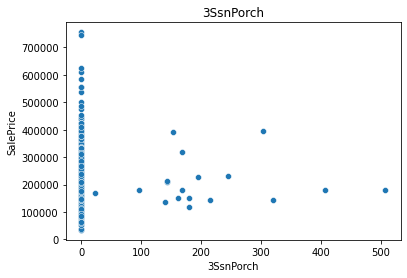

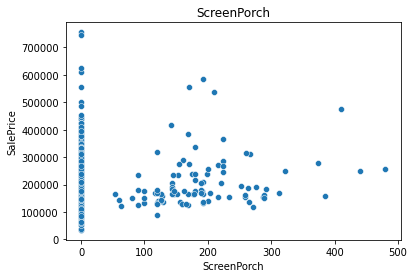

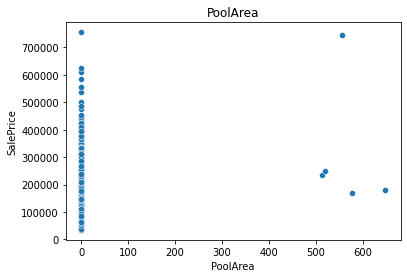

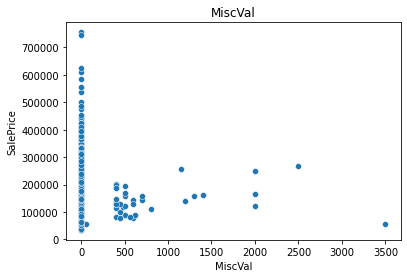

In [106]:
for col in numeric_col:
  sns.scatterplot( x = col, y="SalePrice", data = data_remove_outlier).set_title(col,fontsize=12,color='Black')
  plt.show()

### Check the missing value

In [107]:
#Find the percentage of missing values for each feature
missing_percent = All_data_feature.isnull().sum()/len(All_data_feature)
missing_percent.sort_values(ascending=False).head(20)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
Functional      0.000685
dtype: float64

### Fill values for features with more missing values

In [108]:
All_data_feature['PoolQC'] = All_data_feature['PoolQC'].fillna('None') #means have no swimming pool
All_data_feature['MiscFeature'] = All_data_feature['MiscFeature'].fillna('None') #means have no other feature
All_data_feature['Alley'] = All_data_feature['Alley'].fillna('None') #means have no Alley
All_data_feature['Fence'] = All_data_feature['Fence'].fillna('None') #means have no fence
All_data_feature['FireplaceQu'] = All_data_feature['FireplaceQu'].fillna('None') #means have no Fireplace

In [109]:
#pip install fancyimpute

### Numerical data using KNN imputation

In [110]:
from fancyimpute import KNN
from sklearn import preprocessing

KNN = KNN(k=5)
KNN_impute = KNN.fit_transform(All_data_numeric)

Imputing row 1/2919 with 0 missing, elapsed time: 2.436
Imputing row 101/2919 with 1 missing, elapsed time: 2.438
Imputing row 201/2919 with 0 missing, elapsed time: 2.440
Imputing row 301/2919 with 0 missing, elapsed time: 2.442
Imputing row 401/2919 with 0 missing, elapsed time: 2.443
Imputing row 501/2919 with 0 missing, elapsed time: 2.445
Imputing row 601/2919 with 0 missing, elapsed time: 2.446
Imputing row 701/2919 with 0 missing, elapsed time: 2.448
Imputing row 801/2919 with 0 missing, elapsed time: 2.450
Imputing row 901/2919 with 1 missing, elapsed time: 2.451
Imputing row 1001/2919 with 0 missing, elapsed time: 2.453
Imputing row 1101/2919 with 0 missing, elapsed time: 2.454
Imputing row 1201/2919 with 0 missing, elapsed time: 2.456
Imputing row 1301/2919 with 1 missing, elapsed time: 2.458
Imputing row 1401/2919 with 0 missing, elapsed time: 2.460
Imputing row 1501/2919 with 1 missing, elapsed time: 2.462
Imputing row 1601/2919 with 0 missing, elapsed time: 2.464
Imputing 

### Standardization of Numerical Data

In [111]:
z_scaler = preprocessing.StandardScaler()
all_numeric_knn = z_scaler.fit_transform(KNN_impute)
all_numeric_knn = pd.DataFrame(all_numeric_knn)
all_numeric_knn.columns = [numeric_col]

### Category data use mode imputation

In [112]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
transformed_values=imputer.fit_transform(All_data_category)
all_category_mode = pd.DataFrame(transformed_values)
all_category_mode.columns = [category_col]


### Ordered data (quality, level) use label encoding

In [113]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

#label encoding
la = preprocessing.LabelEncoder()
for i in cols:
  all_category_mode[i] = la.fit_transform(all_category_mode[i])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Merge the category data and numerical data

In [114]:
#Add Id column to merge
all_numeric_knn['Id'] = All_data_feature['Id']
all_category_mode['Id'] = All_data_feature['Id']

all_data = pd.merge(all_numeric_knn,all_category_mode)
all_data = all_data.drop(['Id'],axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


### Non-sequencial data (MSZoning, Neighborhood) use one hot encoding  
get_dummies only process string data

In [116]:
all_data = pd.get_dummies(all_data)

In [117]:
#Check if there is any missing value in the data
all_data.isnull().any()

(LotFrontage,)                False
(LotArea,)                    False
(OverallQual,)                False
(YearBuilt,)                  False
(YearRemodAdd,)               False
                              ...  
('SaleCondition',)_AdjLand    False
('SaleCondition',)_Alloca     False
('SaleCondition',)_Family     False
('SaleCondition',)_Normal     False
('SaleCondition',)_Partial    False
Length: 220, dtype: bool

In [118]:
all_data.head()

,"(LotFrontage,)","(LotArea,)","(OverallQual,)","(YearBuilt,)","(YearRemodAdd,)","(MasVnrArea,)","(BsmtFinSF1,)","(BsmtFinSF2,)","(BsmtUnfSF,)","(TotalBsmtSF,)",...,"('SaleType',)_ConLw","('SaleType',)_New","('SaleType',)_Oth","('SaleType',)_WD","('SaleCondition',)_Abnorml","('SaleCondition',)_AdjLand","('SaleCondition',)_Alloca","('SaleCondition',)_Family","('SaleCondition',)_Normal","('SaleCondition',)_Partial"
0,-0.220742,-0.217879,0.646183,1.046258,0.896833,0.521955,0.581145,-0.293025,-0.934973,-0.444041,...,0,0,0,1,0,0,0,0,1,0
1,0.438475,-0.072044,-0.063185,0.154764,-0.395604,-0.572795,1.178255,-0.293025,-0.630015,0.477316,...,0,0,0,1,0,0,0,0,1,0
2,-0.088899,0.137197,0.646183,0.980221,0.848965,0.332049,0.098189,-0.293025,-0.288644,-0.298802,...,0,0,0,1,0,0,0,0,1,0
3,-0.440481,-0.078385,0.646183,-1.859351,-0.682812,-0.572795,-0.494529,-0.293025,-0.047408,-0.670976,...,0,0,0,1,1,0,0,0,0,0
4,0.614266,0.518903,1.355551,0.947203,0.753229,1.382115,0.469187,-0.293025,-0.161198,0.211802,...,0,0,0,1,0,0,0,0,1,0


# Bulid model

In [119]:
X = all_data[:ntrain]
y = train_data['SalePrice'] 

In [120]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold

kfolds = KFold(n_splits=10, shuffle=True, random_state=123)

def RMSE(prediction,y):
  return np.sqrt(mean_squared_error(prediction, y))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X , y, scoring="neg_mean_squared_error", cv=kfolds))
    return rmse

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

classifiers = []
classifiers.append(LinearRegression())
classifiers.append(RandomForestRegressor(n_estimators = 300, random_state = 40))
classifiers.append(SVR())
classifiers.append(xgb.XGBRegressor(objective='reg:squarederror',n_estimators=300))
classifiers.append(KNeighborsRegressor(n_neighbors=3))
classifiers.append(ExtraTreesRegressor(n_estimators=300))
classifiers.append(GradientBoostingRegressor(n_estimators=300))
classifiers.append(lgb.LGBMRegressor(objective='regression',n_estimators=300))

cv_results = []
for classifier in classifiers:
  print(classifier)
  cv_results.append(cv_rmse(classifier))

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_results = pd.DataFrame({ 'Algorithm': ['LinearRegression','Random Forest','SVR','XGBoost','KNN',
                      'Extra Tree','Gradient Boosting','lightGBM'],
              'Cross Validation Mean': cv_mean,
              'Cross Validation Std': cv_std})
cv_results

LinearRegression()
RandomForestRegressor(n_estimators=300, random_state=40)
SVR()
XGBRegressor(n_estimators=300, objective='reg:squarederror')
KNeighborsRegressor(n_neighbors=3)
ExtraTreesRegressor(n_estimators=300)
GradientBoostingRegressor(n_estimators=300)
LGBMRegressor(n_estimators=300, objective='regression')


,Algorithm,Cross Validation Mean,Cross Validation Std
0,LinearRegression,7.528398e+08,1.470334e+09
1,Random Forest,1.409148e-01,1.626515e-02
2,SVR,1.258260e-01,1.757293e-02
3,XGBoost,1.232927e-01,1.691686e-02
4,KNN,1.949193e-01,1.555693e-02
5,Extra Tree,1.371154e-01,1.182577e-02
6,Gradient Boosting,1.255359e-01,1.649648e-02
7,lightGBM,1.312863e-01,1.587618e-02


### Finally , I choose XGBoost and SVR to bulid the model,because they have better performance than other algorithm

## XGBoost

In [122]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#define own mse and set greater_is_better=False
mse = make_scorer(mean_squared_error,greater_is_better=False)

#using the Grid Search to tune the parameter
random_grid = { 
    'learning_rate': [0.1,0.2,0.4],
    'n_estimators': [100,200,300],
    'colsample_bytree': [0.5, 0.3 ,0.1],
    'max_depth':[5,10,15]
}

XGB = XGBRegressor(objective='reg:squarederror')
grid_search_XGB = GridSearchCV(XGB , random_grid, cv= kfolds ,scoring= mse)
grid_search_XGB.fit(X,y)

best_XGB_estimator = grid_search_XGB.best_estimator_
print(best_XGB_estimator)

XGBRegressor(colsample_bytree=0.3, max_depth=5, n_estimators=300,
             objective='reg:squarederror')


In [167]:
from xgboost import XGBRegressor
XGB = XGBRegressor(colsample_bytree=0.3, learning_rate=0.1, max_depth=5,n_estimators=400, objective='reg:squarederror') #0.1221
XGB.fit(X,y)
cv_rmse(XGB).mean()

0.12211749032803527

## SVR

In [165]:
SVR1 = SVR(epsilon=0.01)
SVR1.fit(X,y)
cv_rmse(SVR1).mean()

0.12136240844944206

## Mix model : XGBoost and SVR

In [173]:
x_test = all_data[ntrain:]
submission_xgb = XGB.predict(x_test)
submission_xgb = np.exp(submission_xgb)

submission_SVR = SVR1.predict(x_test)
submission_SVR = np.exp(submission_SVR)

mix = submission_SVR * 0.6 + submission_xgb*0.4

## Submit final prediction result 

In [174]:
submission = pd.read_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = mix
submission.to_csv('/content/drive/My Drive/colab/house-prices-advanced-regression-techniques/mix.csv')

## Final submission result
RMSE : 0.11666  
Rank : 91/4257 (Top 3%)  
Time : 2022/6/11

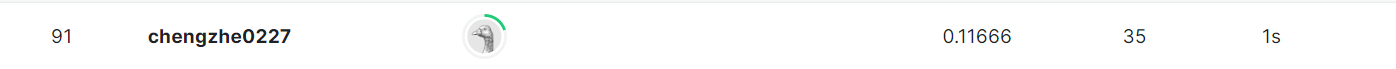

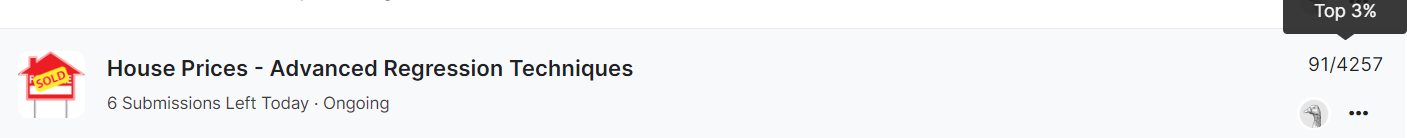